<a href="https://colab.research.google.com/github/vcoelh/ML/blob/main/Handwritten_digit_recognition_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from autils import *
%matplotlib inline

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [ ]:
 #load the dataset 

 X = np.load("X.npy")
 y = np.load("y.npy")
 X = X[0:1000]
 y = y[0:1000]
 print(f'X.shape: {X.shape},\n cinco primeiro elementos de X: {X[:5]}')
 print(f'\ny.shape: {y.shape},\n cinco primeiro elementos de y: {y[:5]}')
 

X.shape: (1000, 400),
 cinco primeiro elementos de X: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y.shape: (1000, 1),
 cinco primeiro elementos de y: [[0]
 [0]
 [0]
 [0]
 [0]]


visualizar o dataset

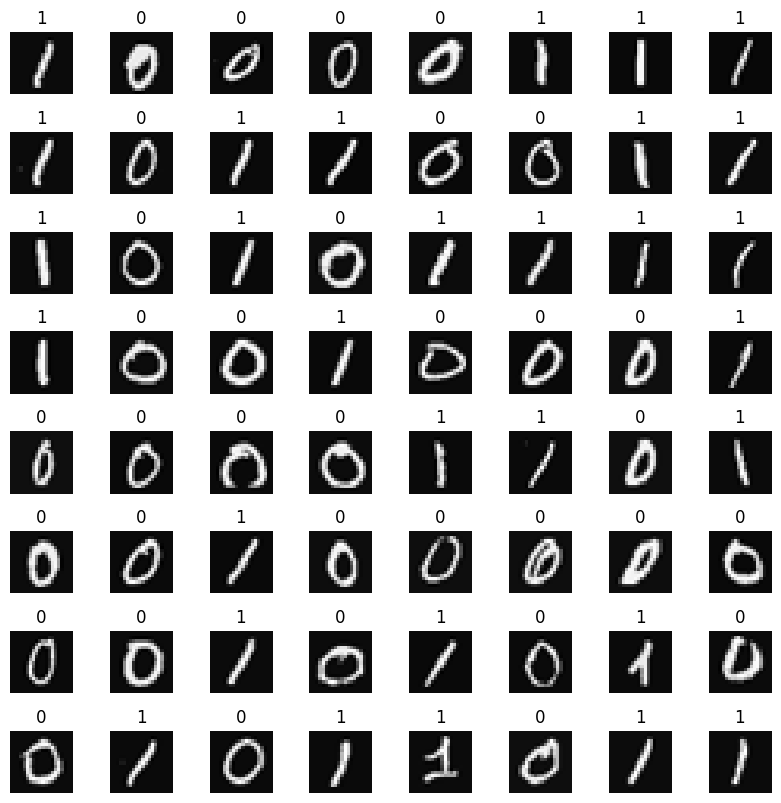

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

A rede neural que vamos implementar terá no layer 1 25 neuronios, no segundo, 15 e no terceiro apenas 1, sendo que todos utilizarão a função de ativação 'sigmoid' e o modelo de layer será Dense como será visto no código

---



In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)), ## dizendo pro tensorflow quais as dimensões do vetor input
        tf.keras.layers.Dense(25, activation = 'sigmoid'),
        tf.keras.layers.Dense(15, activation ='sigmoid'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ], name = 'my_models'
)

In [ ]:
model.summary()

Model: "my_models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                10025     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [ ]:
[layer1, layer2, layer3] = model.layers

In [ ]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer2.get_weights()
print(f'\nshape: W1: {W1.shape}, \nb1: {b1.shape}')
print(f'\nshape: W2: {W2.shape}, \nb2: {b2.shape}')
print(f'\nshape: W3: {W2.shape}, \nb3: {b2.shape}')


shape: W1: (400, 25), 
b1: (25,)

shape: W2: (25, 15), 
b2: (15,)

shape: W3: (25, 15), 
b3: (15,)


In [ ]:
### podemos também ver todos os weights de um determinado layer

print(model.layers[2].weights)

[<tf.Variable 'dense_11/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.10041672],
       [-0.32424918],
       [-0.2514195 ],
       [-0.5817042 ],
       [-0.5711056 ],
       [-0.5569465 ],
       [-0.5494475 ],
       [ 0.59764284],
       [ 0.19572324],
       [ 0.4498915 ],
       [-0.36385077],
       [-0.11409116],
       [ 0.0978843 ],
       [ 0.42470342],
       [-0.53071135]], dtype=float32)>, <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


model.compile vai criar a função loss e aplicar o gradeinte descendente

In [ ]:
from keras import optimizers
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001) ### learning rate : 0.001
)
model.fit(
    X,y,
    epochs = 20
)

Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 0.0224
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 13/20
32/32 [==============================

agora que ja fizemos o treinamento, podemos fazer previções

In [ ]:
prediction = model.predict(X[0].reshape(1,400)) ## a zero
print(prediction)
prediction = model.predict(X[500].reshape(1,400)) ## a one
print(prediction)


1/1 [==============================] - 0s 26ms/step
[[0.01495132]]
1/1 [==============================] - 0s 31ms/step
[[0.97401285]]


criar um threshold se prediction >= 0.5 então é um 1
do contrário é um 0

In [ ]:
if prediction >= 0.5:
  yhat = 1
else:
  yhat = 0

agora vamos implemetar esse algoritmo no dataset que nós temos

1/1 [==============================] - 0s 25ms/step


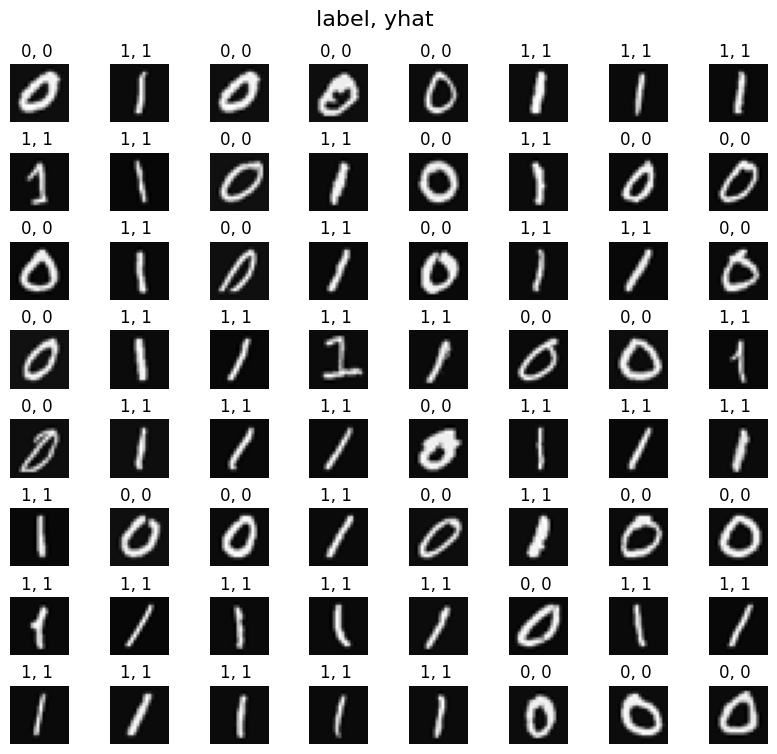

In [ ]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # escolhendo um index aleatorio
    random_index = np.random.randint(m)

    # selecionando a linha correspondente e remodelando a imagem
    X_random_reshaped = X[random_index].reshape((20,20)).T


  # # mostrando 
    ax.imshow(X_random_reshaped, cmap = 'gray')


  ## prevendo utilizando a rede neural 
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
      yhat = 1
    else:
      yhat = 0

    ## mostrando a previsão e label acima da imagem
    ax.set_title(f"{y[random_index,0]}, {yhat} ")
    ax.set_axis_off()


fig.suptitle("label, yhat", fontsize =16)
plt.show()


In [ ]:
def my_dense(a_in,W, b, g):
  units = W.shape[1]
  a_out = np.zeros(units)
  for j in range(units):
    w = W[:,j]
    z = np.dot(w,a_in) + b[j]
    a_out[j] = g(z)
  return a_out


In [ ]:
from keras.activations import sigmoid
x_tst = 0.1 * np.arange(1, 3, 1).reshape(2,)
w_tst = 0.1 * np.arange(1, 7, 1).reshape(2,3)
b_tst = 0.1 * np.arange(1, 4, 1).reshape(3,)
a_text = my_dense(x_tst, w_tst, b_tst, sigmoid)
print(a_text)



[0.54735762 0.57932425 0.61063923]


In [ ]:
def my_sequential(x, W1, b1, W2, b2,W3, b3):
  a1 = my_dense(x, W1, b1, sigmoid)
  a2 = my_dense(a1, W2, b2, sigmoid)
  a3 = my_dense(a2, W3, b3, sigmoid)
  return a3

In [ ]:
#### bora utilizar o mesmos weights criados pelo tensorflow

W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

print(f'W1: {W1_tmp[:2]}, b1: {b1_tmp[:2]}\n')
print(f'W2: {W2_tmp[:2]}, b2: {b2_tmp[:2]}\n')
print(f'W3: {W1_tmp[:2]}, b3: {b3_tmp[:2]}\n')

W1: [[ 0.0302517   0.08132352  0.05773985 -0.11131307 -0.02446977 -0.0928699
  -0.0779704  -0.06915148 -0.08091927  0.09701028  0.03800857  0.00256743
  -0.03000156  0.06909089 -0.05635267 -0.02682352 -0.06394997  0.07266453
   0.04603064  0.02006342 -0.02521089  0.05652729 -0.10694149  0.10009493
  -0.02556872]
 [-0.09972754  0.0573581  -0.00225644 -0.04311643 -0.02166121  0.03187656
   0.11147027  0.04701339  0.04791704  0.06758545  0.08565104  0.00029272
   0.08279373 -0.03798959  0.01138283  0.08999279  0.05407329 -0.02952646
  -0.03509104  0.0193831   0.01857884  0.03652278  0.04658268  0.04760763
   0.0400666 ]], b1: [0.1547914  0.17155772]

W2: [[ 0.426597   -0.22517566 -0.22771597 -0.3502395  -0.30549228 -0.10324236
  -0.653066    0.4130862   0.48606086  0.6170371  -0.22025329 -0.21510802
   0.04652981  0.54631644 -0.5534708 ]
 [ 0.26355225 -0.3022441  -0.5102325  -0.20358823 -0.10322643 -0.5597038
  -0.31842938  0.54948074  0.44061792  0.12360861 -0.5601231  -0.6570672
   0.30